<a href="https://colab.research.google.com/github/stkisengese/titanic-survial-prediction-ml/blob/main/notebook/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Machine Learining - Iteration 1: Naive Baseline

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Predict all passagers die(survival = 0)

In [2]:
# Load data
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')

In [3]:
# write submission with all passengers predicted as died
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": 0
})

# Save the submission file
# submission.to_csv('../data/gender_submission.csv', index=False)

In [4]:
# print(submission.head(10))
# print(submission.tail(10))

Iteration 2: 

In [5]:
# Exploratory Data analysis
print("Shape: ", train.shape)
train.info()
train.describe()
train.columns
# train.head(10)

Shape:  (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Check for missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Basic Visualizations

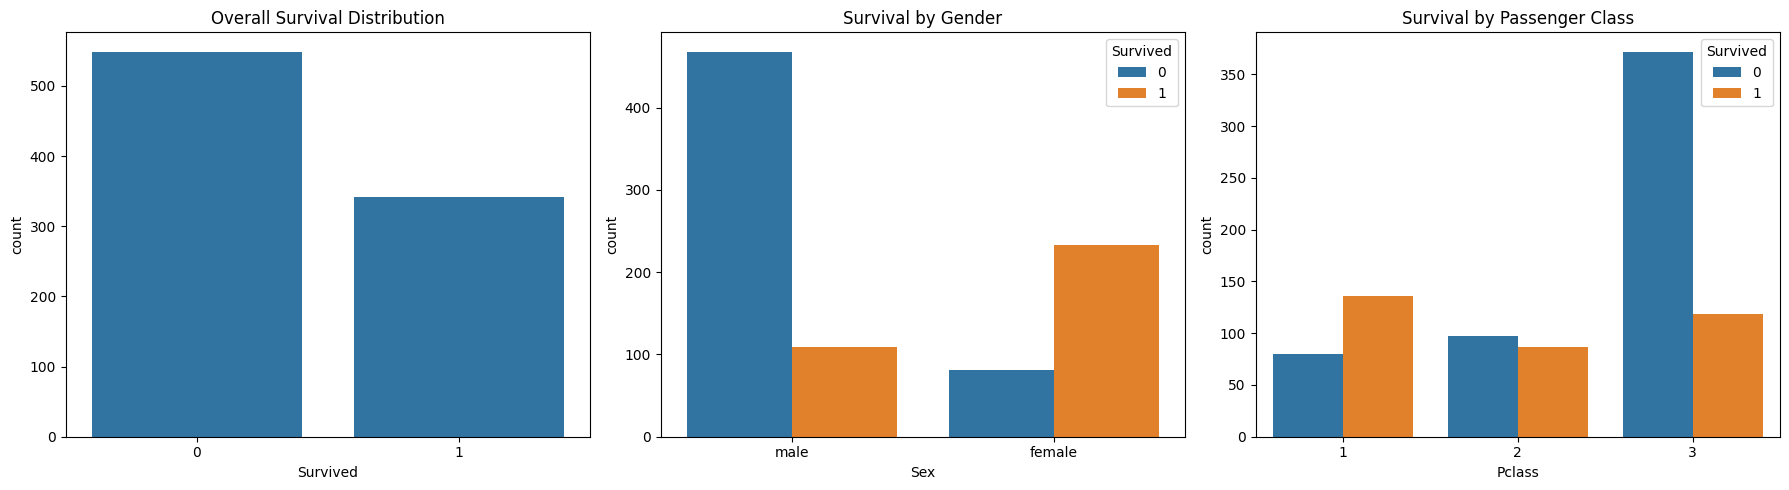

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#define figure size and grid (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(ax=axes[0], x="Survived", data=train)
axes[0].set_title("Overall Survival Distribution")

sns.countplot(ax=axes[1], x="Sex", hue="Survived", data=train)
axes[1].set_title("Survival by Gender")

sns.countplot(ax=axes[2],x="Pclass", hue="Survived", data=train)
plt.title("Survival by Passenger Class")

plt.tight_layout()
plt.show()


- Numeric relationships

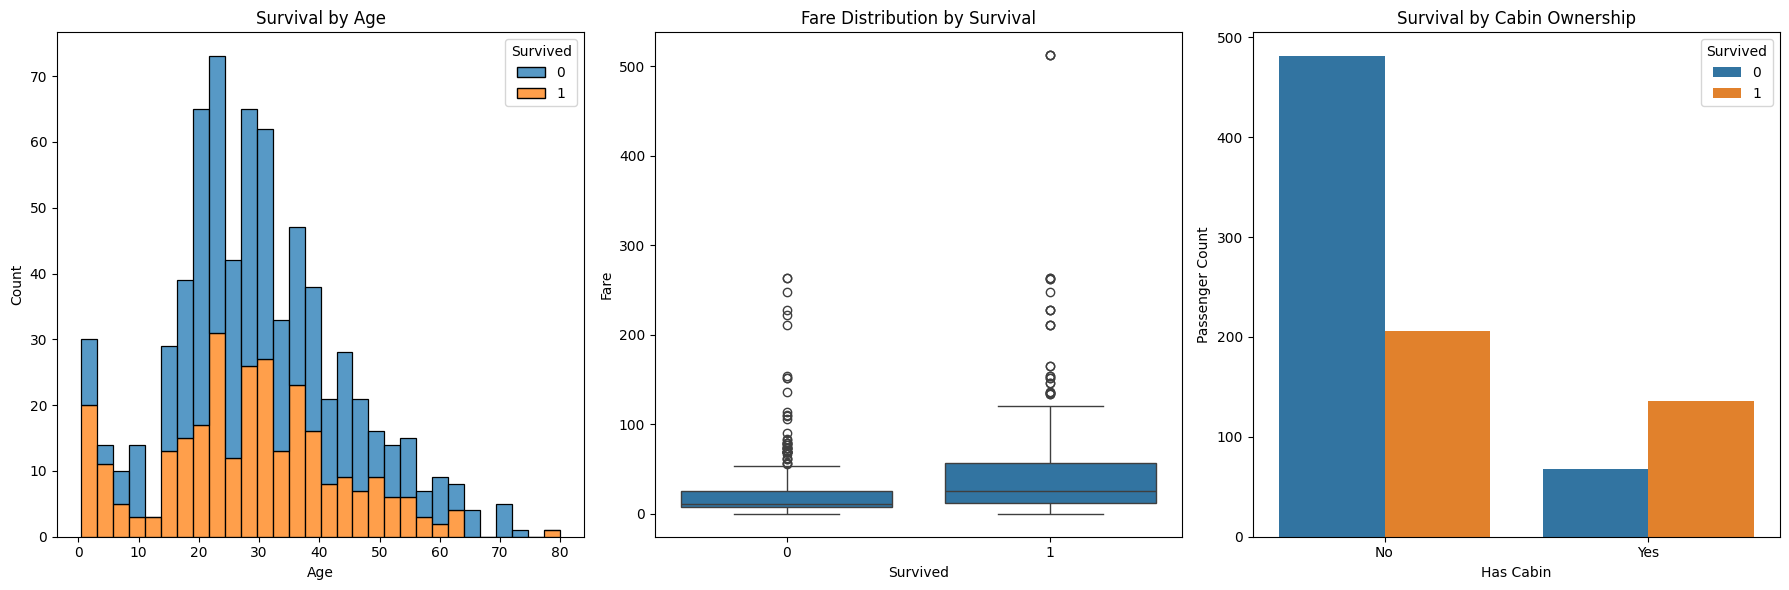

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(ax=axes[0], data=train, x="Age", hue="Survived", multiple="stack", bins=30)
axes[0].set_title("Survival by Age")

sns.boxplot(ax=axes[1], x="Survived", y="Fare", data=train)
axes[1].set_title("Fare Distribution by Survival")

# Create a temporary column for cabin ownership
cabin_status = train["Cabin"].notnull()
train_temp = pd.DataFrame(train['Survived'])
train_temp["HasCabin"] = cabin_status

# Plot survival by cabin ownership
sns.countplot(x="HasCabin", hue="Survived", data=train_temp, ax=axes[2])
plt.title("Survival by Cabin Ownership")
plt.xlabel("Has Cabin")
plt.ylabel("Passenger Count")
plt.xticks([0, 1], ["No", "Yes"])

plt.tight_layout()
plt.show()


- Categorical features relationships

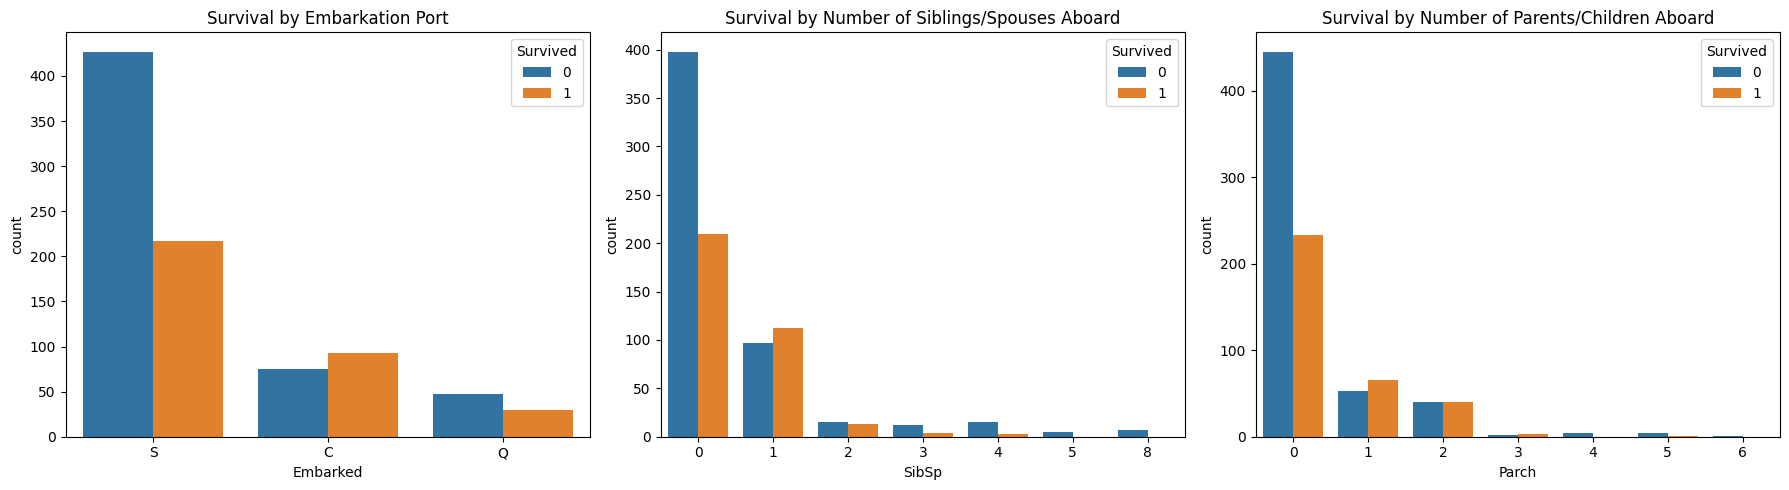

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x="Embarked", hue="Survived", data=train, ax=axes[0])
axes[0].set_title("Survival by Embarkation Port")

sns.countplot(x="SibSp", hue="Survived", data=train,  ax=axes[1])
axes[1].set_title("Survival by Number of Siblings/Spouses Aboard")

sns.countplot(x="Parch", hue="Survived", data=train,  ax=axes[2])
axes[2].set_title("Survival by Number of Parents/Children Aboard")

plt.tight_layout()
plt.show()

- Feature selection and cleaning

In [10]:
def preprocess(df):
    """Clean and prepare Titanic dataset."""
    df = df.copy()  # Avoid modifying original data
    
    # Fill missing values
    df["Age"] = df["Age"].fillna(df["Age"].median())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())
    
    # Convert categorical variables
    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df["Embarked"] = df["Embarked"].replace({"S": 0, "C": 1, "Q": 2})
    
    return df

# --- Apply preprocessing ---
train = preprocess(train)
test = preprocess(test)  # for later prediction

# Feature selection
features = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch"]
X = train[features]
y = train["Survived"]
X_test = test[features]

/tmp/ipykernel_18678/1902429475.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
/tmp/ipykernel_18678/1902429475.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Embarked"] = df["Embarked"].replace({"S": 0, "C": 1, "Q": 2})
/tmp/ipykernel_18678/1902429475.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futu

In [11]:
# Check for missing values
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

- Model Training and Validation(Logistic modelling)

In [12]:
# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train logistic regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Validation accuracy
train_acc = model.score(X_train, y_train)
val_acc = model.score(X_val, y_val)

print(f"Training accuracy: {train_acc:.4f} ({train_acc:.2%})")
print(f"Validation accuracy: {val_acc:.4f} ({val_acc:.2%})")

Training accuracy: 0.8020 (80.20%)
Validation accuracy: 0.8101 (81.01%)


In [13]:
# Cross-validation score (more reliable)
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"\n5-Fold Cross-Validation:")
print(f"  Mean accuracy: {cv_scores.mean():.4f} ({cv_scores.mean():.2%})")
print(f"  Std deviation: {cv_scores.std():.4f}")
print(f"  Scores: {[f'{s:.4f}' for s in cv_scores]}")

# Check for overfitting
if train_acc - val_acc > 0.05:
    print("\n  Warning: Possible overfitting detected!")
    print(f"   Gap between train and validation: {(train_acc - val_acc):.2%}")
else:
    print("\n✓ Model appears well-balanced (no significant overfitting)")



5-Fold Cross-Validation:
  Mean accuracy: 0.7845 (78.45%)
  Std deviation: 0.0203
  Scores: ['0.7877', '0.7753', '0.7809', '0.7584', '0.8202']

✓ Model appears well-balanced (no significant overfitting)


- Feature Importance

In [14]:
# Train on full dataset for final predictions
model.fit(X, y)

# Show feature coefficients
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print(feature_importance.to_string(index=False))
print("\nInterpretation:")
print("  - Negative coefficient = increases death probability")
print("  - Positive coefficient = increases survival probability")
print(f"  - Most important: {feature_importance.iloc[0]['Feature']}")

Feature  Coefficient
    Sex     2.650345
 Pclass    -1.051466
  SibSp    -0.336875
  Parch    -0.096009
    Age    -0.038512
   Fare     0.003012

Interpretation:
  - Negative coefficient = increases death probability
  - Positive coefficient = increases survival probability
  - Most important: Sex


- Generate predictions

In [15]:
# Make predictions
predictions = model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

# submission.to_csv('../data/gender_submission.csv', index=False)

## ITERATION 3: SMART FEATURE ENGINEERING

- Exploratory Data Analysis

In [16]:
print(f"\n Overall survival rate: {train['Survived'].mean():.2%}")

print("\n Survival by Sex:")
print(train.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean']))
print("→ Insight: 'Women and children first' policy!")

print("\n Survival by Class:")
print(train.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean']))
print("→ Insight: First class had better access to lifeboats")

print("\n Survival by family size:")
family_survival = train.copy()
family_survival['FamilySize'] = family_survival['SibSp'] + family_survival['Parch'] + 1
print(family_survival.groupby('FamilySize')['Survived'].agg(['count', 'mean']))
print("→ Insight: Small families (2-4) survived better than large or solo")



 Overall survival rate: 38.38%

 Survival by Sex:
     count  sum      mean
Sex                      
0      577  109  0.188908
1      314  233  0.742038
→ Insight: 'Women and children first' policy!

 Survival by Class:
        count  sum      mean
Pclass                      
1         216  136  0.629630
2         184   87  0.472826
3         491  119  0.242363
→ Insight: First class had better access to lifeboats

 Survival by family size:
            count      mean
FamilySize                 
1             537  0.303538
2             161  0.552795
3             102  0.578431
4              29  0.724138
5              15  0.200000
6              22  0.136364
7              12  0.333333
8               6  0.000000
11              7  0.000000
→ Insight: Small families (2-4) survived better than large or solo


- Feature Engineering

In [25]:
def title_feature(df):
    # Extract title from name (Mr, Mrs, Miss, Master, etc.)
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    
    # Group rare titles
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                         'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                         'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
    # Map titles to numbers
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)

    print(f"✓ Title extracted (5 categories)")
    return df

def family_size_feature(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    print(f"✓ FamilySize created (range: {df['FamilySize'].min()}-{df['FamilySize'].max()})")
    return df

def is_alone_feature(df):
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
    print(f"✓ IsAlone flag created ({df['IsAlone'].sum()} solo travelers)")
    return df

def age_groups_feature(df):
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                             labels=[0, 1, 2, 3, 4])
    df['AgeGroup'] = df['AgeGroup'].astype(int)
    print(f"✓ AgeGroup created (5 bins: child, teen, young, adult, senior)")
    return df

def fare_features(df):
    # farebins feature
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3], duplicates='drop')
    df['FareBin'] = df['FareBin'].astype(int)
    print(f"✓ FareBin created (4 quartiles)")

    # fare per person feature
    df['FarePerPerson'] = df['Fare'] / df['FamilySize']
    print(f"✓ FarePerPerson calculated")
    return df

def deck_feature(df):
    df['Deck'] = df['Cabin'].str[0]
    df['Deck'] = df['Deck'].fillna('Unknown')
    # Map decks to numbers (higher decks = better escape routes)
    deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 
                    'F': 6, 'G': 7, 'T': 8, 'Unknown': 9}
    df['Deck'] = df['Deck'].map(deck_mapping)
    print(f"✓ Deck extracted from Cabin")
    return df

In [30]:
def engineer_features(df):
    """Create smart features based on Titanic disaster insights"""
    df = preprocess(df)  # Apply basic cleaning    
    
    df = title_feature(df)
    df = family_size_feature(df)
    df = is_alone_feature(df)
    df = age_groups_feature(df)
    df = fare_features(df)
    # df = deck_feature(df)
        
    return df

print("\nEngineering features...")
train_processed = engineer_features(train)
test_processed = engineer_features(test)


Engineering features...
✓ Title extracted (5 categories)
✓ FamilySize created (range: 1-11)
✓ IsAlone flag created (537 solo travelers)
✓ AgeGroup created (5 bins: child, teen, young, adult, senior)
✓ FareBin created (4 quartiles)
✓ FarePerPerson calculated
✓ Title extracted (5 categories)
✓ FamilySize created (range: 1-11)
✓ IsAlone flag created (253 solo travelers)
✓ AgeGroup created (5 bins: child, teen, young, adult, senior)
✓ FareBin created (4 quartiles)
✓ FarePerPerson calculated


- Feature Selection

In [32]:
# Select engineered features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
            'Title', 'FamilySize', 'IsAlone', 'AgeGroup', 
            'FareBin', 'FarePerPerson']

X = train_processed[features]
y = train_processed['Survived']
X_test = test_processed[features]

print(f"Total features: {len(features)}")
print(f"Features: {features}")

Total features: 11
Features: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'AgeGroup', 'FareBin', 'FarePerPerson']


- Model comparison

In [33]:
# Split for validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Try multiple models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

best_model = None
best_score = 0
best_name = ""

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    mean_score = cv_scores.mean()
    
    print(f"\n{name}:")
    print(f"  CV Mean: {mean_score:.4f} ({mean_score:.2%})")
    print(f"  CV Std:  {cv_scores.std():.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_model = model
        best_name = name

print(f"\n🏆 Best model: {best_name} with {best_score:.2%} CV accuracy")


Logistic Regression:
  CV Mean: 0.8171 (81.71%)
  CV Std:  0.0127

Random Forest:
  CV Mean: 0.8115 (81.15%)
  CV Std:  0.0264

🏆 Best model: Logistic Regression with 81.71% CV accuracy


In [34]:
# Train Random Forest on full data to see feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop features by importance:")
for idx, row in importance_df.head(8).iterrows():
    print(f"  {row['Feature']:20s} {row['Importance']:.4f} {'█' * int(row['Importance']*100)}")



Top features by importance:
  Age                  0.1804 ██████████████████
  Title                0.1623 ████████████████
  FarePerPerson        0.1534 ███████████████
  Fare                 0.1496 ██████████████
  Sex                  0.1470 ██████████████
  Pclass               0.0575 █████
  FamilySize           0.0498 ████
  AgeGroup             0.0380 ███


- Final Predictions

In [35]:
# Train best model on full dataset
best_model.fit(X, y)

# Make predictions
predictions = best_model.predict(X_test)

# Create submission
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

submission.to_csv('../data/gender_submission.csv', index=False)